In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import csv
import pandas as pd

%matplotlib inline 

In [2]:
path = '..\output\data\sat50_temporal_MDRW_sampled_10_rep1.csv' 
df = pd.read_csv(path, sep=',', index_col='Timestamp')
df

,Unnamed: 0,Connectivity,Redundancy_avg,Disparity_avg,Modularity,Criticity,RCost,Efficiency
Timestamp,,,,,,,,
0,0,0.96,4.270833,0.351321,0.048281,2,356,0.682667
10,1,0.96,4.541667,0.399843,0.037296,2,362,0.663167
20,2,0.88,4.181818,0.390642,0.040634,0,298,0.641667
30,3,0.84,3.773810,0.394117,0.042234,0,276,0.620833
40,4,0.84,3.321429,0.389085,0.042408,0,278,0.615000
...,...,...,...,...,...,...,...,...
1750,175,0.96,5.739583,0.462061,0.023233,4,356,0.654500
1760,176,0.96,3.729167,0.336187,0.038148,2,344,0.679000
1770,177,0.96,4.125000,0.312767,0.044946,1,338,0.693667


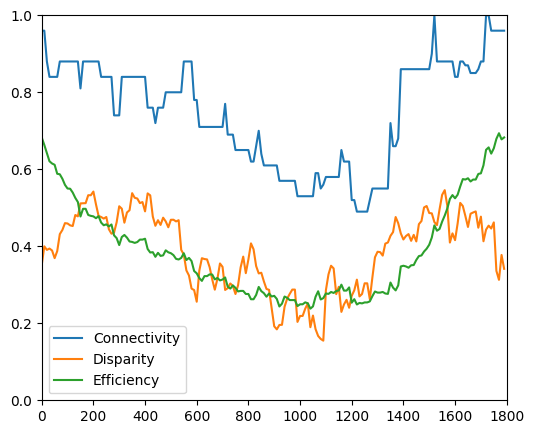

In [3]:
plt.figure(figsize=(6,5))
plt.plot(df['Connectivity'], label='Connectivity')
plt.plot(df['Disparity_avg'], label='Disparity')
plt.plot(df['Efficiency'], label='Efficiency')
plt.xlim(0,1800)
plt.ylim(0,1)
plt.legend()

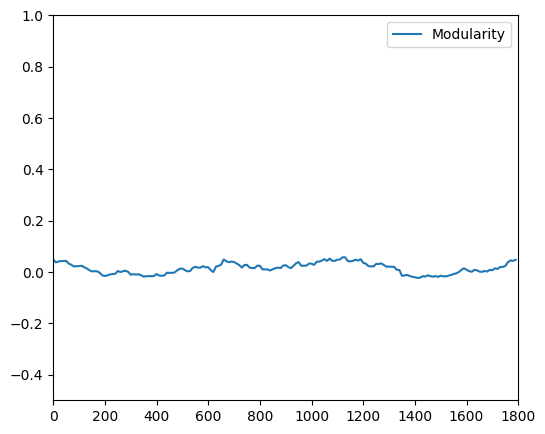

In [4]:
plt.figure(figsize=(6,5))
plt.plot(df['Modularity'], label='Modularity')
plt.xlim(0,1800)
plt.ylim(-0.5,1)
plt.legend()

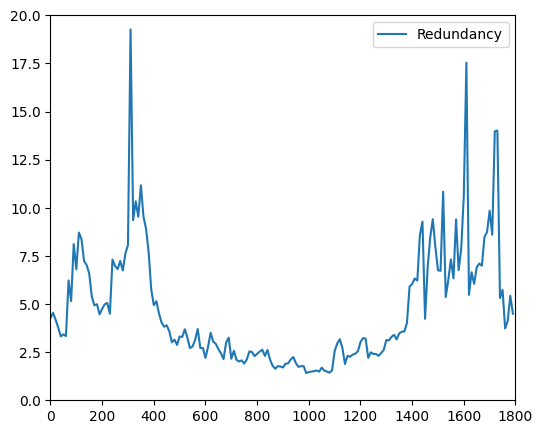

In [7]:
plt.figure(figsize=(6,5))
plt.plot(df['Redundancy_avg'], label='Redundancy')
plt.xlim(0,1800)
plt.ylim(0,20)
plt.legend()

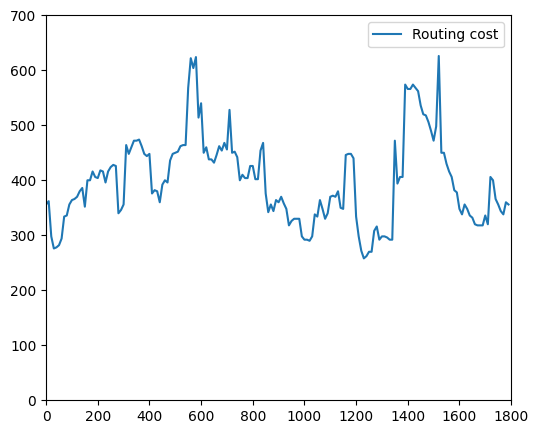

In [8]:
plt.figure(figsize=(6,5))
plt.plot(df['RCost'], label='Routing cost')
plt.xlim(0,1800)
plt.ylim(0,700)
plt.legend()

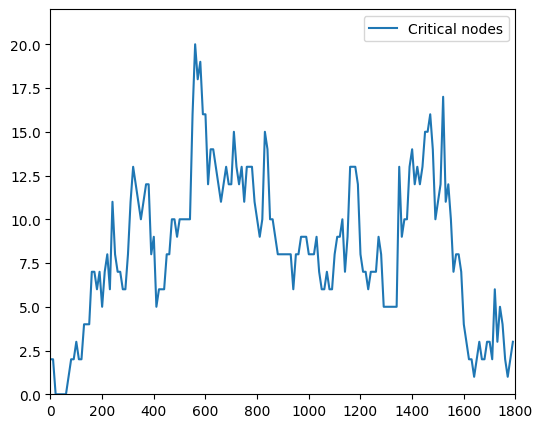

In [11]:
plt.figure(figsize=(6,5))
plt.plot(df['Criticity'], label='Critical nodes')
plt.xlim(0,1800)
plt.ylim(0,22)
plt.legend()

In [12]:
variables = ['Redundancy_avg', 'Connectivity', 'Disparity_avg', 'Modularity', 'Criticity', 'RCost', 'Efficiency']

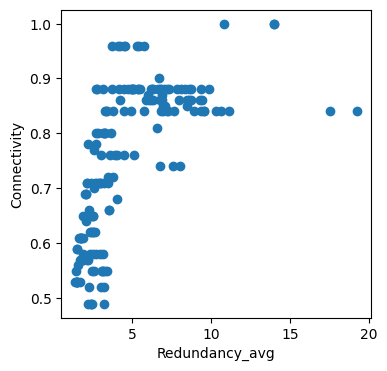

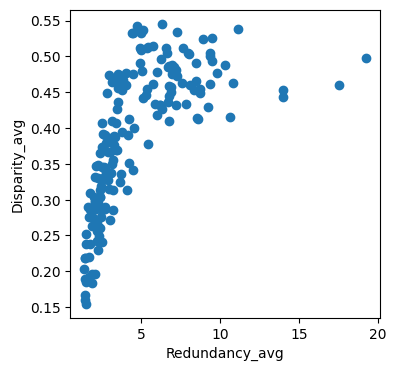

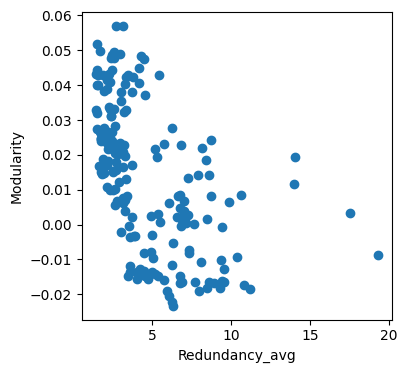

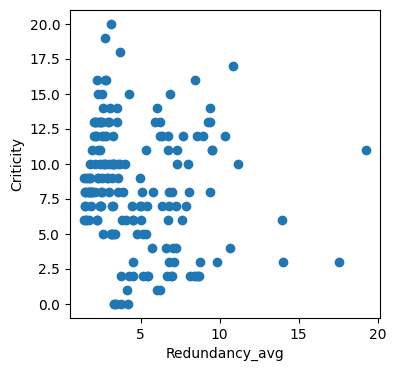

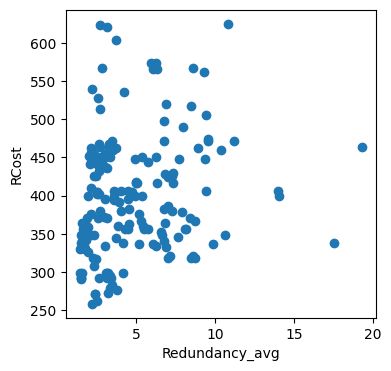

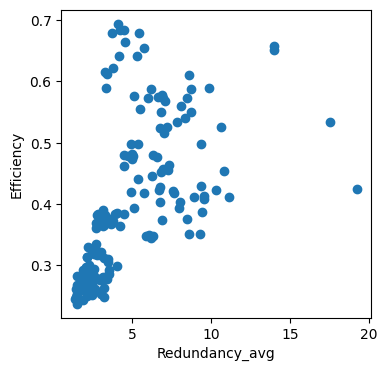

In [13]:
metric = 'Redundancy_avg'
for var in variables:
    if var != metric:
        plt.figure(figsize=(4,4))
        plt.scatter(df[metric], df[var])
        plt.xlabel(metric)
        plt.ylabel(var)

In [3]:
# Plotting figures for division comparison

connectivity = {
    'original':[46.2, 81, 82, 100],
    'mdrw':[50.8, 83.2, 67.5, 100],
    'rnd':[44.8, 81, 66.9, 100],
    'ffd':[53.3, 84.8, 69.4, 100]
}

# Plotted as comparison_redundancy.png
redundancy = {
    'original':[1.6, 4, 7.9, 11],
    'mdrw':[1.2, 2.5, 5.8, 6.4],
    'rnd':[1.6, 3.9, 7.8, 10.7],
    'ffd':[1.3, 2.7, 5.4, 5.9]
}

# Plotted as comparison_disparity.png
disparity = {
    'original':[25, 45, 47.2, 52.3],
    'mdrw':[11.6, 27.1, 35.9, 31.5],
    'rnd':[24.7, 44.5, 46.7, 52.1],
    'ffd':[16.5, 31.5, 40, 34]
}

# Plotted as comparison_criticity.png
criticity = {
    'original':[9, 10, 14, 16],
    'mdrw':[3, 5, 5, 7],
    'rnd':[7, 11, 12, 15],
    'ffd':[4, 6, 6, 8]
}

routing = {
    'original':[3506, 5938, 5996, 31930],
    'mdrw':[203, 389, 340, 1863],
    'rnd':[446, 777, 776, 3422],
    'ffd':[359, 791, 563, 3416]
}

# Plotted as comparison_efficiency.png
efficiency = {
    'original':[22.7, 40.9, 41.3, 69.9],
    'mdrw':[48.3, 59.5, 51.7, 99.4],
    'rnd':[38, 41.2, 40.9, 72],
    'ffd':[46.8, 56.5, 52.3, 92.1]
}

In [7]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x: 'ArrayLike', y1: 'ArrayLike | float', y2: 'ArrayLike | float' = 0, where: 'Sequence[bool] | None' = None, interpolate: 'bool' = False, step: "Literal['pre', 'post', 'mid'] | None" = None, *, data=None, **kwargs) -> 'PolyCollection'
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) 

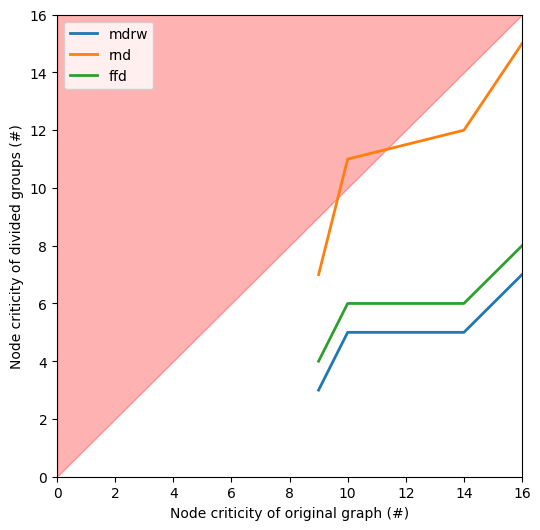

In [20]:
algos = ['mdrw', 'rnd', 'ffd']


plt.figure(figsize=(6,6))
plt.xlim(0,16)
plt.ylim(0,16)
plt.xlabel('Node criticity of original graph (#)')
plt.ylabel('Node criticity of divided groups (#)')
for a in algos:
    plt.plot(criticity['original'], criticity[a], lw=2, label=a)
plt.fill_between(np.arange(0,17,1), np.arange(0,17,1), 16, color='red', alpha=0.3)
plt.legend()